In [35]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [36]:


pit_agrs_100_30k = pd.read_csv('cass_exp/pit_100_each/pit_agrs_100_30k_merge.csv', header = 3)

pit_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.230000,83.180000,0.000000,0.000000
1,17.0,0.114885,91.598410,0.026450,141.456200
2,19.0,0.076513,94.404543,0.017616,94.209798
3,20.0,0.182703,86.279088,0.056657,325.782332
4,21.0,0.146016,89.034258,0.049146,281.857932
...,...,...,...,...,...
25281,29995.0,0.929781,35.698928,0.037059,223.300288
25282,29997.0,0.929921,35.672556,0.036995,223.201861
25283,29998.0,0.930061,35.687196,0.036931,222.863072
25284,29999.0,0.930201,35.667841,0.036867,222.605100


In [37]:
pit_no_agrs_100_30k = pd.read_csv('cass_exp/pit_100_each/pit_no_agrs_100_30k_merge.csv', header = 2)

pit_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.220000,84.680000,0.000000,0.000000
1,22.0,0.109890,92.347660,0.024200,117.351200
2,23.0,0.073187,94.903543,0.016117,78.155873
3,24.0,0.054835,96.181482,0.012076,58.558249
4,25.0,0.244625,81.888184,0.188251,1060.276515
...,...,...,...,...,...
25001,29994.0,0.937135,35.748271,0.030108,181.979061
25002,29996.0,0.937261,35.757765,0.030055,181.660534
25003,29997.0,0.937386,35.773234,0.030003,181.417221
25004,29998.0,0.936845,35.808985,0.030090,181.693820


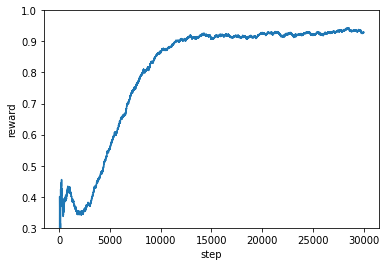

In [38]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

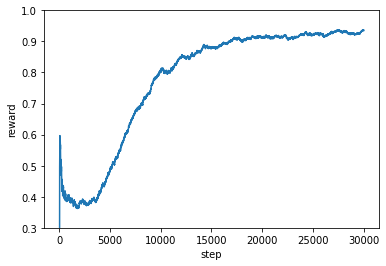

In [39]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

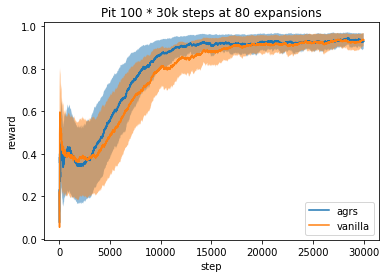

In [40]:
fig, axs = plt.subplots(ncols=1)
plt.title('Pit 100 * 30k steps at 80 expansions')
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)


axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"], 
                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5)
axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"], 
                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5)



axs.legend(['agrs','vanilla'], loc=4)

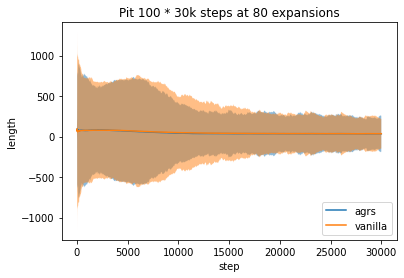

In [41]:
fig, axs = plt.subplots(ncols=1)
plt.title('Pit 100 * 30k steps at 80 expansions')
sns.lineplot(x="step", y="length", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_agrs,ax=axs, ci=99)


axs.fill_between(x=df_agrs["step"], y1=df_agrs["length"] + df_agrs["length_se"], 
                 y2=df_agrs["length"] - df_agrs["length_se"], alpha=.5)

axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["length"] + df_no_agrs["length_se"], 
                 y2=df_no_agrs["length"] - df_no_agrs["length_se"], alpha=.5)


axs.legend(['agrs','vanilla'], loc=4)

In [ ]:
# pit agrs 100 30k plot
###########################


sns.tsplot(time='step', value='run/total_reward', data=pit_agrs_100_30k)

In [ ]:
pit_no_agrs_100_30k = pd.read_csv('cass_exp/pit_100_each/pit_no_agrs_100_30k_merge.csv', header = 2)

In [ ]:
pit_no_agrs_100_30k


In [ ]:
pit_no_agrs_100_30k.sort_values(by='step', inplace=True)

In [ ]:
sns.set(style="darkgrid")

# Plot the responses for different events and regions
#sns.lineplot(x="step", y="run/total_reward",
 #            data = pit_agrs_100_30k)
fig, axs = plt.subplots(ncols=1)


sns.regplot(x='step', y='run/total_reward', data=pit_no_agrs_100_30k, marker=' ', color='blue', ci=.99, ax=axs)
sns.regplot(x='step', y='run/total_reward', data = pit_agrs_100_30k, marker = ' ', color='red', ci=.99, ax=axs)


In [ ]:
import numpy as np; np.random.seed(1)

x = pit_agrs_100_30k['step']
y=pit_agrs_100_30k['run/total_reward']
data = pd.DataFrame(y,x)
fig, (ax) = plt.subplots(ncols=1, sharey=True)

def tsplot(ax, data,**kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0) 



tsplot(ax, data)

ax.set_title("sns.tsplot")


plt.show()

In [ ]:
time_series_array = pit_agrs_100_30k['run/total_reward']
time_series_array

In [ ]:
data

In [ ]:
n_steps = 30

time_series_df = pd.DataFrame(time_series_array)
smooth_path = time_series_df.rolling(20).mean()
smooth_path.fillna(0)
path_deviation = time_series_df.rolling(20).std()
path_deviation.fillna(0)

left = (smooth_path-2*path_deviation).fillna(0)
right =  (smooth_path+2*path_deviation).fillna(0)
plt.plot(smooth_path, linewidth=2)
plt.fill_between(path_deviation.index, left, right, color='b', alpha=.1)

In [ ]:
right